In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ethenergy=pd.read_csv("/content/ETH_ENERGY.csv")

In [ ]:
ethenergy.columns

Index(['Minimum_TWh', 'EtherPrice', 'AvgGasPrice', 'AvgTranFee',
       'BlockDifficulty', 'BlockReward', 'BlockSize', 'BlockTime', 'GAS_LIMIT',
       'NETWORK_HASH', 'NETWORK_UTILIZATION', 'TRANSACTION_GROWTH', 'UNCLES',
       'VERFIED_CONTACT', 'MARKET_CAP'],
      dtype='object')

In [ ]:
ethenergy.describe()

,Minimum_TWh,EtherPrice,AvgGasPrice,AvgTranFee,BlockDifficulty,BlockReward,BlockSize,BlockTime,GAS_LIMIT,NETWORK_HASH,NETWORK_UTILIZATION,TRANSACTION_GROWTH,UNCLES,VERFIED_CONTACT,MARKET_CAP
count,1708.000000,1708.000000,1.708000e+03,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1.708000e+03,1.708000e+03,1708.000000,1.708000e+03,1708.000000,1708.000000,1708.000000
mean,6.871450,891.930773,4.932871e+10,2.665041,3788.313221,16087.387588,32413.744731,14.384590,1.161589e+07,2.927449e+05,0.805646,8.310888e+05,545.988876,123.122365,101009.934314
std,4.344312,1161.217575,5.988286e+10,5.600117,2757.060697,3865.567402,19349.950781,2.695745,6.724300e+06,2.194581e+05,0.168133,3.257391e+05,359.910912,85.405492,137932.676597
min,2.131205,83.900000,7.320701e+09,0.050000,439.714000,10304.625000,4179.000000,12.830000,4.304681e+06,2.960947e+04,0.303800,1.309120e+05,149.000000,0.000000,8708.832831
25%,2.856856,197.140000,1.407796e+10,0.150000,2226.850250,13505.656250,19820.500000,13.147500,7.997354e+06,1.678874e+05,0.719650,5.823115e+05,319.750000,61.750000,20688.169878
50%,4.864579,316.925000,2.282227e+10,0.370000,2759.709500,13643.250000,24593.000000,13.330000,9.328498e+06,1.965213e+05,0.848250,7.619125e+05,396.500000,93.000000,31474.081575
75%,10.421289,892.615000,6.470980e+10,2.862500,3566.676250,20301.632812,40873.000000,14.340000,1.247842e+07,2.871970e+05,0.949925,1.147745e+06,541.250000,169.250000,88629.748750
max,17.447576,4810.970000,7.100000e+11,68.720000,12872.734000,29819.375000,98869.000000,30.310000,3.007684e+07,1.022458e+06,0.991500,1.716600e+06,2096.000000,433.000000,568966.160100


In [ ]:
ethenergy=ethenergy.dropna()

In [ ]:
Y = ethenergy['Minimum_TWh'] # Dependent variable
X = ethenergy[['EtherPrice','AvgGasPrice','AvgTranFee','BlockDifficulty',
 'BlockReward','BlockSize','BlockTime','GAS_LIMIT',
 'NETWORK_HASH','NETWORK_UTILIZATION','TRANSACTION_GROWTH',
 'UNCLES','VERFIED_CONTACT', 'MARKET_CAP']] # Indepedent variables

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting Model
X_train, X_test, Y_train, Y_test = train_test_split(
 X, Y, test_size=0.2, random_state=42
)                                            # Split into test and train data
GBmodel = GradientBoostingRegressor().fit(X_train, Y_train)
print("Train R2:", GBmodel.score(X_train, Y_train))
print("Test R2 :", GBmodel.score(X_test, Y_test))

Train R2: 0.9951072480974159
Test R2 : 0.9878636299725692


In [ ]:
!pip install shap PyALE lime

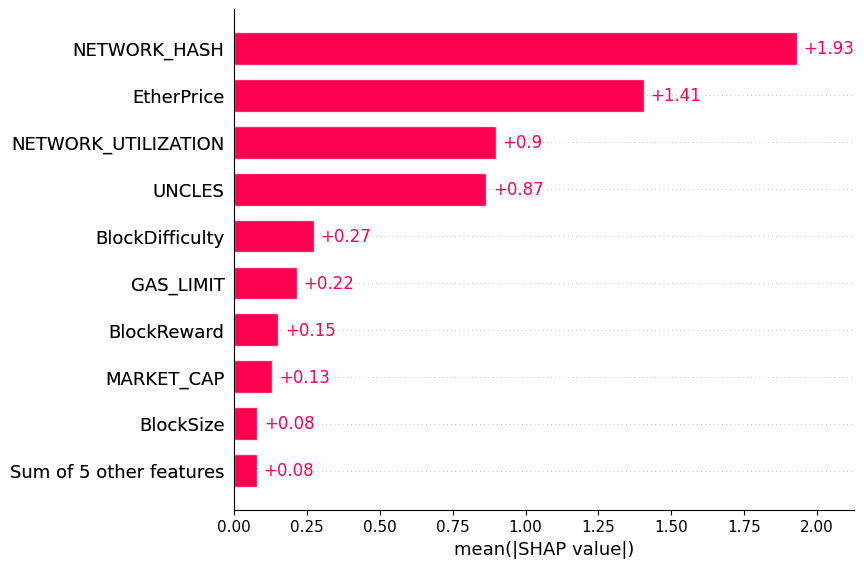

In [ ]:
GBmodel=my_model
import shap
explainer = shap.Explainer(my_model)
shap_values = explainer(X)
shap.plots.bar(shap_values)

/tmp/ipython-input-3017445420.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X)


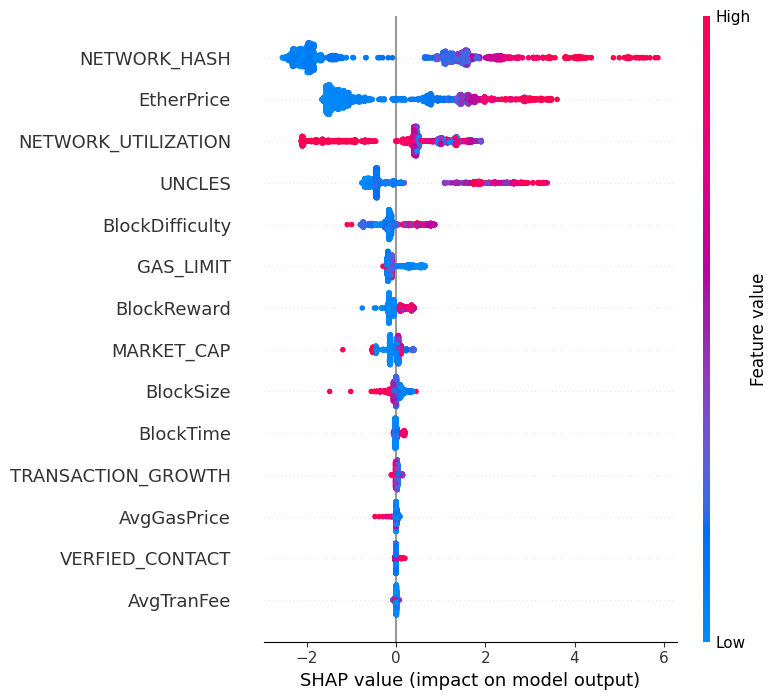

In [ ]:
shap.summary_plot(shap_values, X)

In [ ]:
mean_abs = np.abs(shap_values.values).mean(axis=0)
feat_imp = pd.Series(mean_abs,
index=X.columns).sort_values(ascending=False)
print("Feature importance (mean |SHAP|):")
print(feat_imp) # Most importance features

Feature importance (mean |SHAP|):
NETWORK_HASH           1.930477
EtherPrice             1.407036
NETWORK_UTILIZATION    0.898545
UNCLES                 0.865881
BlockDifficulty        0.273536
GAS_LIMIT              0.215937
BlockReward            0.150947
MARKET_CAP             0.130966
BlockSize              0.079112
BlockTime              0.024893
TRANSACTION_GROWTH     0.019253
AvgGasPrice            0.015017
VERFIED_CONTACT        0.010612
AvgTranFee             0.007712
dtype: float64


In [ ]:
top3 = list(feat_imp.head(3).index)
print("Top 3 features:", top3)
# Top 3 features: ['NETWORK_HASH', 'EtherPrice', 'NETWORK_UTILIZATION']
!pip install PyALE


Top 3 features: ['NETWORK_HASH', 'EtherPrice', 'NETWORK_UTILIZATION']


INFO:PyALE._ALE_generic:Continuous feature detected.
INFO:PyALE._ALE_generic:Continuous feature detected.
INFO:PyALE._ALE_generic:Continuous feature detected.


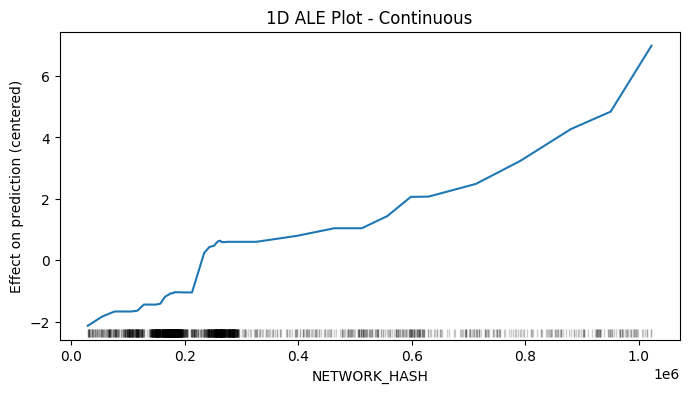

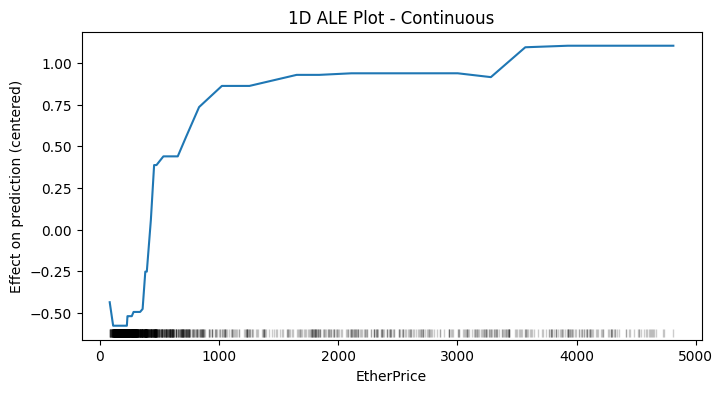

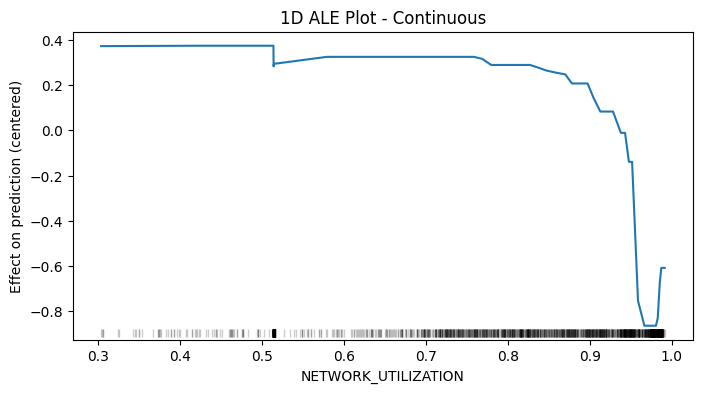

In [ ]:
from PyALE import ale
ale_1 = ale(X=X, model=my_model, feature=[top3[0]], grid_size=50,
include_CI=False)
ale_2 = ale(X=X, model=my_model, feature=[top3[1]], grid_size=50,
include_CI=False)
ale_3 = ale(X=X, model=my_model, feature=[top3[2]], grid_size=50,
include_CI=False)

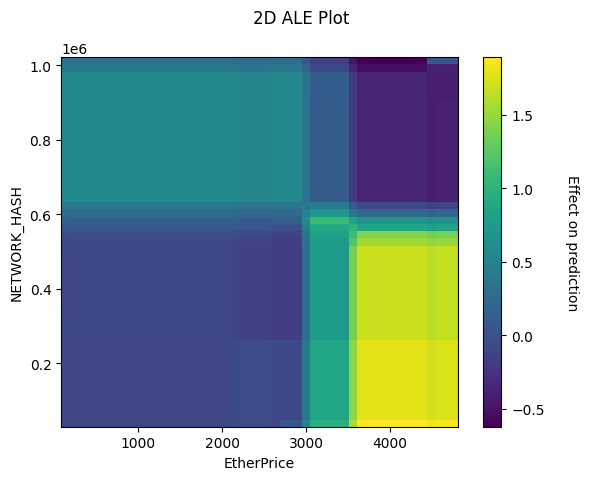

In [ ]:
ale_2d = ale(X=X, model=my_model, feature=[top3[0], top3[1]],
grid_size=50)

In [ ]:
!pip install lime

/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

Intercept 5.739800084987314
Prediction_local [12.33600246]
Right: 12.541533506856782


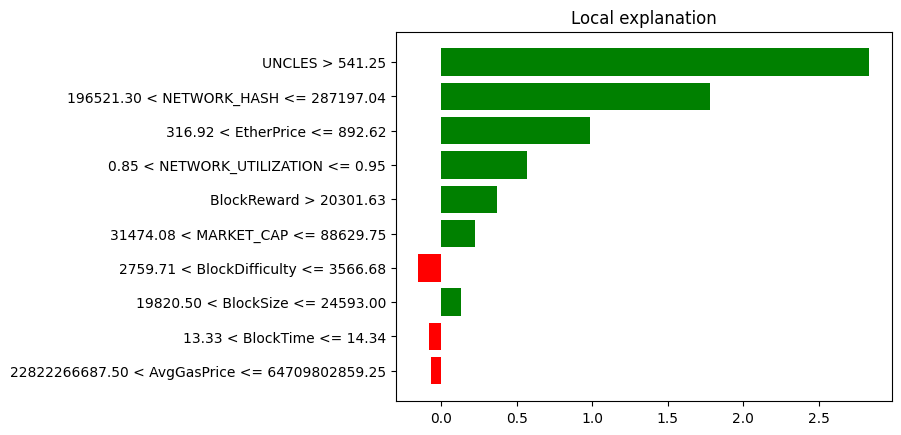

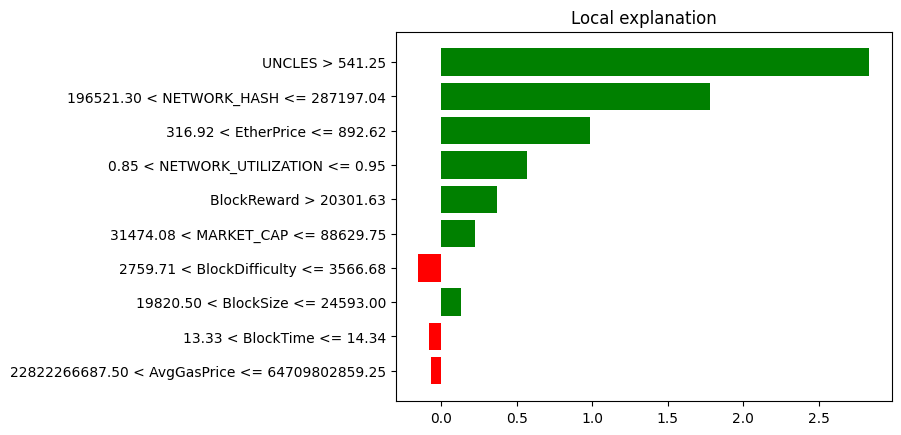

In [ ]:
import lime
import lime.lime_tabular
X_featurenames = X.columns
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
 np.array(X),
 feature_names=X_featurenames,
 class_names=['Regression'],
 verbose=True,
 mode='regression'
)
idx = 10 # or any index within len(X_test)
exp = lime_explainer.explain_instance(
 X_test.iloc[idx],
 my_model.predict,
 num_features=10
 )
exp.as_pyplot_figure()

### Differences between Random Forest Regressor and Gradient Boosting Regressor:

*   **Random Forest Regressor:** This is an ensemble learning method that builds multiple decision trees during training and outputs the mean prediction of the individual trees for regression tasks. It's known for its robustness, ability to handle high-dimensional data, and reduced overfitting compared to single decision trees.
*   **Gradient Boosting Regressor:** This is another ensemble technique that builds trees sequentially. Each new tree attempts to correct the errors made by the previous ones. It generally aims for higher accuracy but can be more prone to overfitting if not carefully tuned.

### Impact on the code:

If you wanted to switch to a Random Forest Regressor, you would primarily need to change the model initialization in the cell where `GBmodel` is defined. The rest of your explanation code (SHAP, PyALE, LIME) would still work because these tools interact with the model's prediction method, which both regressors provide.

Here's how you would modify the training cell (`BheVdGxb2ewg`) to use a `RandomForestRegressor`:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # Import Random Forest Regressor

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)                                            # Split into test and train data

# Initialize and train the Random Forest Regressor
RFmodel = RandomForestRegressor(random_state=42) # You can add parameters like n_estimators, max_depth, etc.
RFmodel.fit(X_train, Y_train)

print("Train R2:", RFmodel.score(X_train, Y_train))
print("Test R2 :", RFmodel.score(X_test, Y_test))

# You would then assign this new model to 'my_model' for the subsequent explanation steps
my_model = RFmodel

After running the above cell, `my_model` would refer to the `RandomForestRegressor`, and all your subsequent SHAP, PyALE, and LIME calls (which use `my_model`) would generate explanations based on this new model.

LIME helps understand *why* a particular prediction was made for a single data instance by creating a locally faithful, interpretable model around that prediction. For a regression model like yours, it shows how each feature contributes to the final predicted numerical value for a specific data point.

Here's a breakdown of the LIME code in cell `nywpYFew3wDv`:

1.  **`lime.lime_tabular.LimeTabularExplainer(...)`**: This initializes the LIME explainer. It's configured for tabular data (`LimeTabularExplainer`) and for a regression problem (`mode='regression'`). It learns the characteristics of your dataset (`np.array(X)`) to create local surrogate models.

2.  **`idx = 10`**: A specific data point from your test set (`X_test.iloc[idx]`) is selected. LIME explains predictions for individual instances, not the model's overall behavior.

3.  **`exp = lime_explainer.explain_instance(...)`**: This is where the explanation is generated. LIME builds a simpler, interpretable model (like linear regression) around the selected instance by perturbing the input data and observing the `my_model.predict` outcomes. It then uses this local model to attribute importance to each feature for that specific prediction.

4.  **`exp.as_pyplot_figure()`**: This visualizes the explanation. The generated plot shows the features that most influenced the prediction for the chosen instance, indicating whether they pushed the prediction higher or lower, and by how much. The `Intercept` is the expected prediction without any features, and `Prediction_local` is the prediction from the local interpretable model.